# Comparison of Regressors for Abalone Age Prediction

## The dataset

### What is the purpose of the dataset? 
### What are the features
### What is the target?

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor




In [2]:
coloumn_names = ['Sex',
               'Length',
               'Diameter',
               'Height',
               'Whole weight',
               'Shucked weight',
               'Viscera weight',
               'Shell weight',
               'Rings'
               ]

In [3]:
dataset = pd.read_csv('abalone.data', sep=",", header=None)
dataset.columns = coloumn_names
dataset['Sex'] = dataset['Sex'].map({'M': 0, 'F': 1, 'I':2})
dataset.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


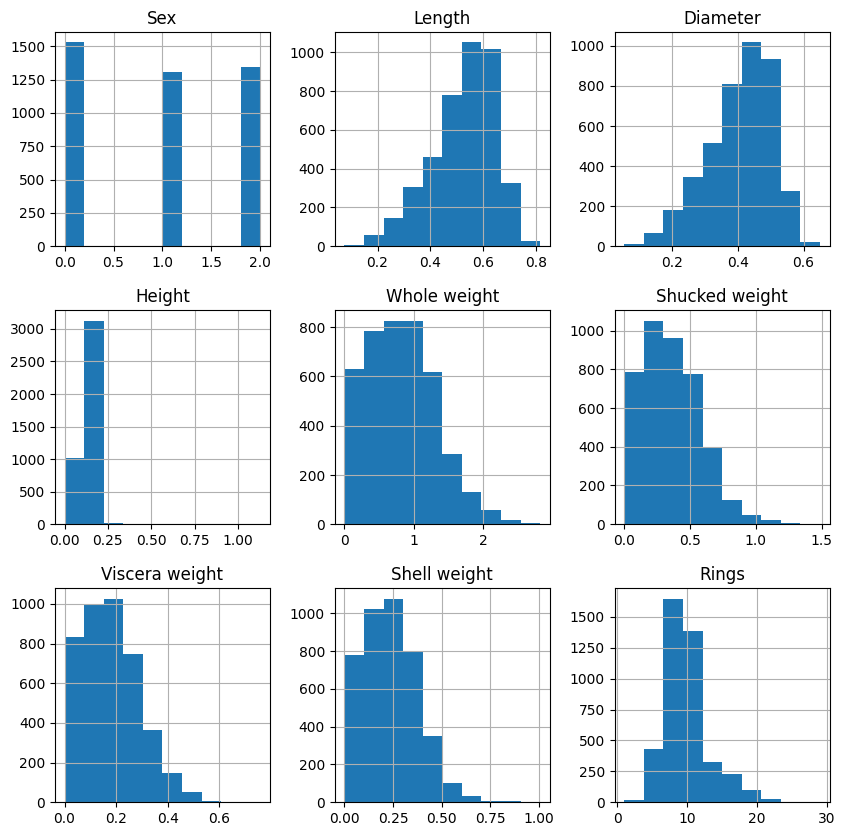

In [5]:
dataset.hist(figsize=(10,10));

In [6]:
#dataset_onehot = pd.get_dummies(dataset,columns=dataset['Sex'])
#dataset_onehot = pd.concat([dataset, pd.get_dummies(dataset['Sex'])], axis=1)
#dataset_onehot.drop('Sex', axis=1, inplace=True)
#dataset_onehot = pd.get_dummies(dataset, columns=['Sex'])

#dataset_onehot.head()

In [7]:
features = dataset.drop('Rings', axis=1)
targets = dataset['Rings']

In [8]:
trainval_features, test_features, trainval_targets, test_targets = train_test_split(features, targets, test_size=0.2,random_state=42)

In [10]:
def evaluate(model):
    predictions_train = model.predict(trainval_features)

    print(f"Train R2: {r2_score(trainval_targets, predictions_train)}")
    print(f"Train MSE: {mean_squared_error(trainval_targets, predictions_train)}")
    print(f"Train MAE: {mean_absolute_error(trainval_targets, predictions_train)}")
    print()

    predictions_test = model.predict(test_features)
    print()
    print(f"R2: {r2_score(test_targets, predictions_test)}")
    print(f"MSE: {mean_squared_error(test_targets, predictions_test)}")
    print(f"MAE: {mean_absolute_error(test_targets, predictions_test)}")

In [ ]:
def train_grid_search(classifier, parameter_grid,scoring,refit, features, target, cv=5, verbose=1):
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=parameter_grid,
        scoring=scoring,
        refit= refit, 
        cv=cv,
        verbose=verbose,
        n_jobs=-1
    )

    grid_search.fit(features, target)
    results = pd.DataFrame(grid_search.cv_results_)
    best_model = grid_search.best_estimator_

    print(f"best parameters: {grid_search.best_params_}")
    print(f"best score: {grid_search.best_score_:.4f}")

    return best_model, results

In [43]:
metrics_regressor = ['r2_score','neg_mean_squared_error' ,'neg_mean_squared_error' ]


param_grid_RF_regressor = {
    'max_depth': np.arange(2, 31, 5),           
    'n_estimators': np.arange(50, 501, 50),   
    'min_samples_split': np.arange(2, 11, 2),  
}

param_grid_GB = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 0.25, 0.05),
    'max_depth': np.arange(3, 11, 2)
    }

In [44]:
train_grid_search(RandomForestRegressor(),param_grid_RF_regressor,metrics_regressor,'r2_score',trainval_features,trainval_targets)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
best parameters: {'max_depth': np.int64(7), 'min_samples_split': np.int64(4), 'n_estimators': np.int64(150)}
best score: -1.5033


(RandomForestRegressor(max_depth=np.int64(7), min_samples_split=np.int64(4),
                       n_estimators=np.int64(150)),
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0         0.164744      0.022665         0.005613        0.000797   
 1         0.307079      0.015024         0.007215        0.001204   
 2         0.454447      0.015001         0.010213        0.001470   
 3         0.607519      0.011684         0.012608        0.000487   
 4         0.748390      0.017758         0.014824        0.000751   
 ..             ...           ...              ...             ...   
 295       3.691427      0.049256         0.038292        0.000873   
 296       4.267935      0.059011         0.041689        0.001189   
 297       4.749616      0.049792         0.044215        0.002625   
 298       5.105473      0.054838         0.044010        0.001172   
 299       5.385243      0.116665         0.048913        0.002138   
 
      param_max_depth  param_

In [45]:
random_forest_regressor = RandomForestRegressor(max_depth=7,min_samples_split=4,n_estimators=150)
random_forest_regressor.fit(trainval_features,trainval_targets)
evaluate(random_forest_regressor)


Train R2: 0.69834164052057
Train MSE: 3.1022466288934893
Train MAE: 1.2759022393890596


R2: 0.5435645098310347
MSE: 4.9410100533260755
MAE: 1.549947500185183


In [12]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(trainval_features, trainval_targets)
evaluate(linear_regression_model)

Train R2: 0.5331708151519303
Train MSE: 4.800859049499582
Train MAE: 1.5811550493173565


R2: 0.5427053625654411
MSE: 4.950310502936191
MAE: 1.606760859825025
